# **Vorbereitung**

In [2]:
# Import der Python Pakete
import os
#import progressbar
#from google.colab import drive
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# import matplotlib.pyplot as plt
# from __future__ import print_function, division
# import os
# import numpy as np
# import glob
# import torch
# from torchvision.utils import make_grid
# import torch.nn as nn # for definition of network
# import torch.optim as optim # for optimizazion of network
# import torch.nn.functional as F # for loss function
# from torch.utils.data import DataLoader # for loading data
# from torch.autograd import Variable
# from torchvision import datasets, transforms
# import torchvision.models as models
# from torch.utils.data import random_split
# import time
# import copy
# import shutil
# import random

In [3]:
## Verbindung mit Google Drive herstellen um die Bilder zu laden
#drive.mount('/content/gdrive', force_remount=True)  # use force_remount=True param after upload of new data

In [4]:
## Auswahl des Ordners, in welchem die Bilder liegen
#%cd gdrive/MyDrive/Pixel-Power/Bilder/

# **Ein paar Basics**

### Ein Bild besteht gewöhnlich aus 3 Ebenen:  <font color='red'>Rot</font> - <font color='green'>Grün</font> - <font color='blue'>Blau</font>

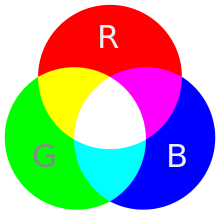



### Man kann Farben am Computer wiedergeben, indem man angibt, wie viel <font color='red'>rot</font>, <font color='green'>grün</font> und <font color='blue'>blau</font> sie enthalten sollen.


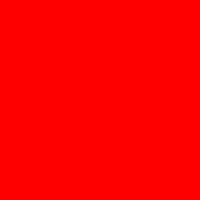

In [5]:
# Rot, Grün und Blau sind einfach zu erzeugen -> Rot
farbe_rot = Image.new('RGB',(200,200),(255,0,0))
display(farbe_rot)

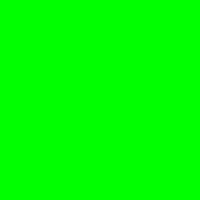

In [6]:
# Rot, Grün und Blau sind einfach zu erzeugen -> Grün
farbe_grün = Image.new('RGB',(200,200),(0,255,0))
display(farbe_grün)

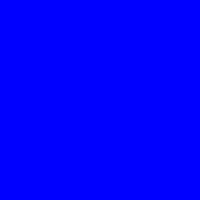

In [7]:
# Rot, Grün und Blau sind einfach zu erzeugen -> Blau
farbe_blau = Image.new('RGB',(200,200),(0,0,255))
display(farbe_blau)

Schwarz:


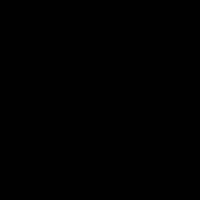

Weiß:


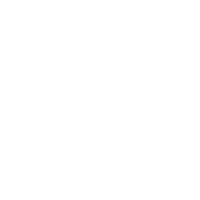

Lila:


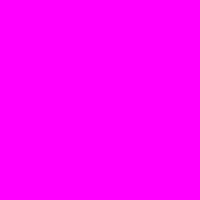

Grün:


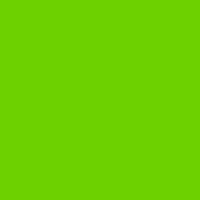

In [8]:
# Beispiel für andere Farben
print("Schwarz:")
farbe_schwarz = Image.new('RGB',(200,200),(0,0,0)) # keine Farben
display(farbe_schwarz)

print("Weiß:")
farbe_weiß = Image.new('RGB',(200,200),(255,255,255)) # alle Farben
display(farbe_weiß)

print("Lila:")
farbe_lila = Image.new('RGB',(200,200),(255,0,255)) # Rot und Blau
display(farbe_lila)

print("Grün:")
farbe_grün = Image.new('RGB',(200,200),(109,209,0)) # Grün mit Rot
display(farbe_grün)


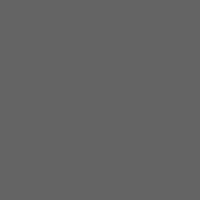

In [9]:
# Probiere aus, wie welche Farben gemischt werden können.
farb_experiment = Image.new('RGB',(200,200),(100,100,100)) 
display(farb_experiment)

# **Und jetzt geht's los**

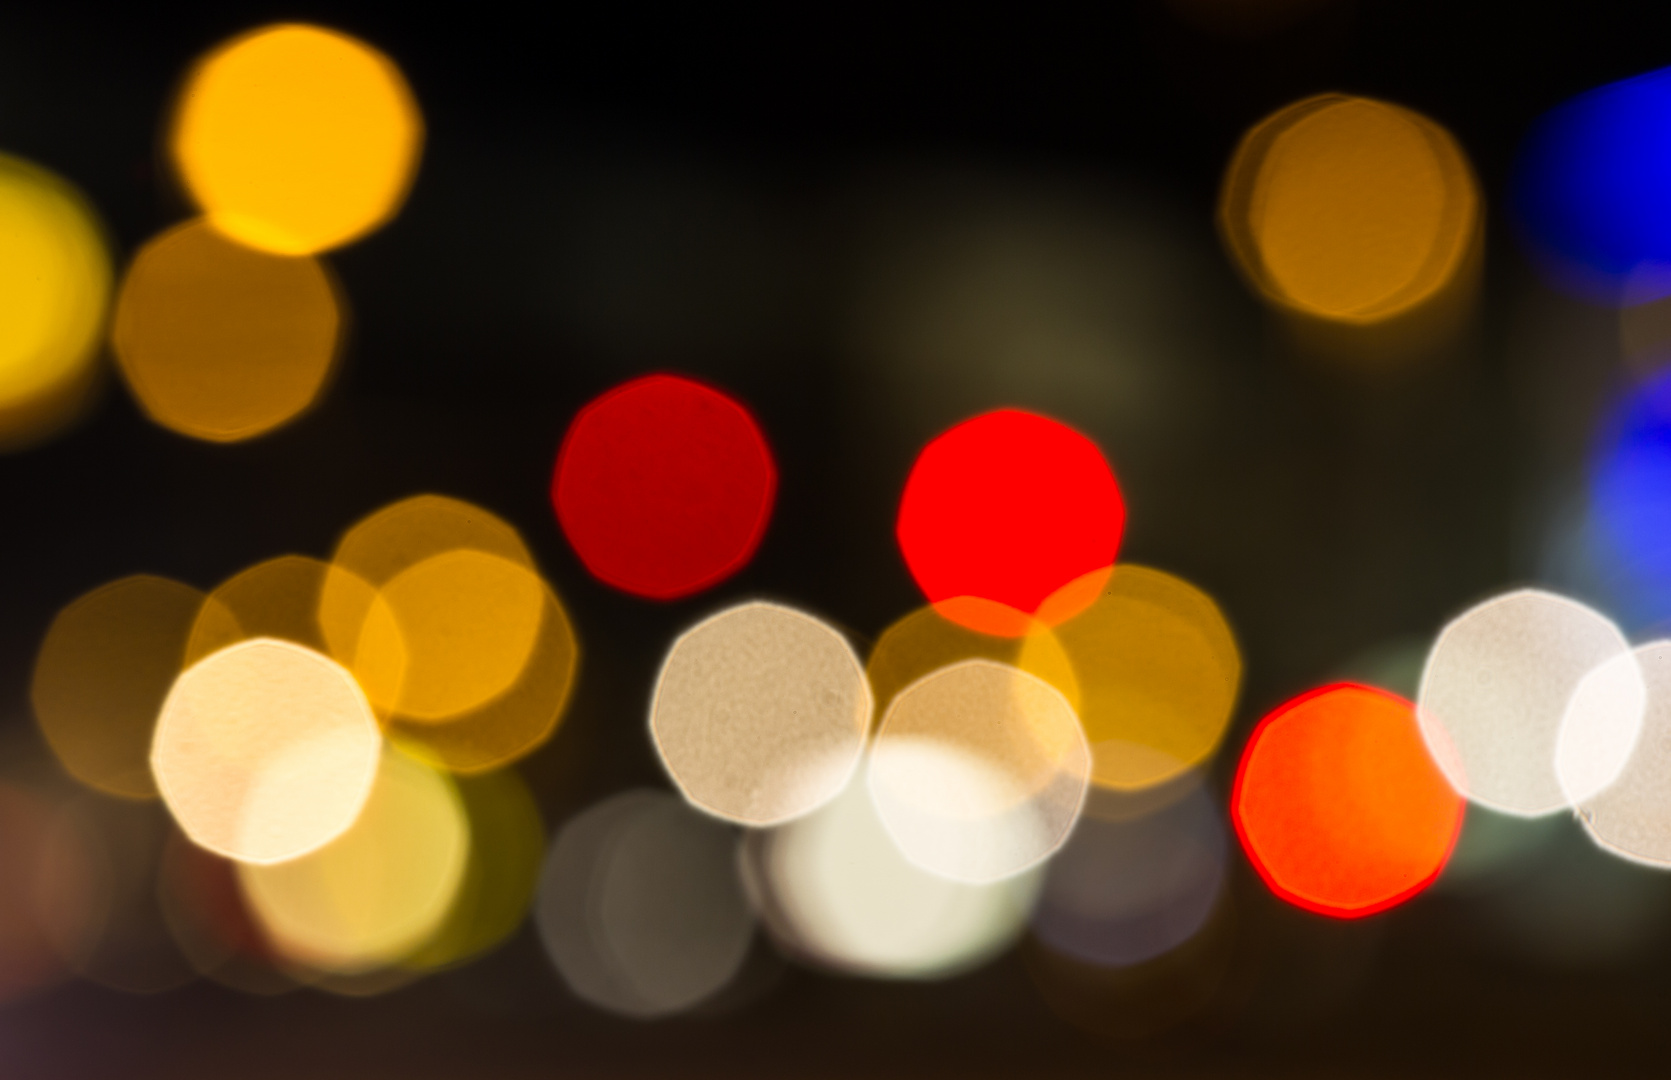

In [10]:
# Auswahl und Anzeigen des Bilds (Quelle: https://www.fotocommunity.de/photo/lichtpunkte-kmikka/33475018)
beispiel_1 = Image.open('Bilder/Beispiel.jpg')
display(beispiel_1)

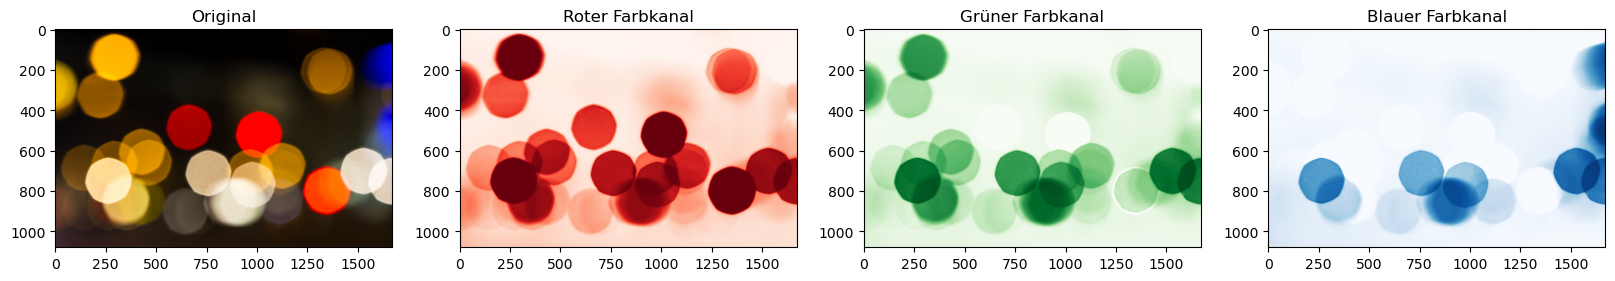

In [11]:
# Aufsplittung des Bildes in die 3 Ebenen
M = np.asarray(beispiel_1)

plt.figure(figsize=(20, 6))

plt.subplot(141)
plt.imshow(M[:, :, :], vmin=0, vmax=255)
plt.title("Original")

plt.subplot(142)
plt.imshow(M[:, :, 0], cmap='Reds', vmin=0, vmax=255)
plt.title("Roter Farbkanal")

plt.subplot(143)
plt.imshow(M[:, :, 1], cmap='Greens', vmin=0, vmax=255)
plt.title("Grüner Farbkanal")

plt.subplot(144)
plt.imshow(M[:, :, 2], cmap='Blues', vmin=0, vmax=255)
plt.title("Blauer Farbkanal")

plt.show()

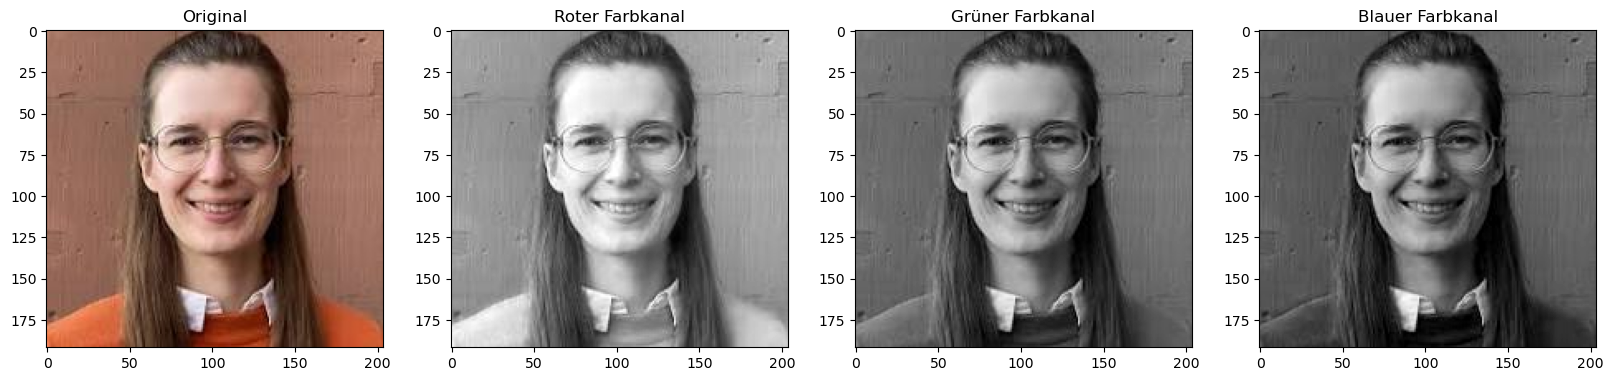

In [12]:
# Bild anzeigen

beispiel_k = Image.open('Bilder/Katharina.jpeg')

original_bild = np.asarray(beispiel_k)

plt.figure(figsize=(20, 6))

plt.subplot(141)
plt.imshow(original_bild[:, :, :], vmin=0, vmax=255)
plt.title("Original")

plt.subplot(142)
plt.imshow(original_bild[:, :, 0], cmap="gray", vmin=0, vmax=255)
plt.title("Roter Farbkanal")

plt.subplot(143)
plt.imshow(original_bild[:, :, 1],cmap="gray", vmin=0, vmax=255)
plt.title("Grüner Farbkanal")

plt.subplot(144)
plt.imshow(original_bild[:, :, 2],cmap="gray", vmin=0, vmax=255)
plt.title("Blauer Farbkanal")

plt.show()

[197  85  47]


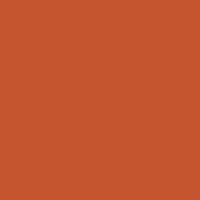

In [13]:
# Man kann auch für einzelne Pixel anschauen, welche Farbe sie haben
pixel_farbe = original_bild[180,180]
print(pixel_farbe)
display(Image.new('RGB',(200,200), tuple(pixel_farbe)))

[240 131  88]


Text(0.5, 1.0, 'Verändertes Bild')

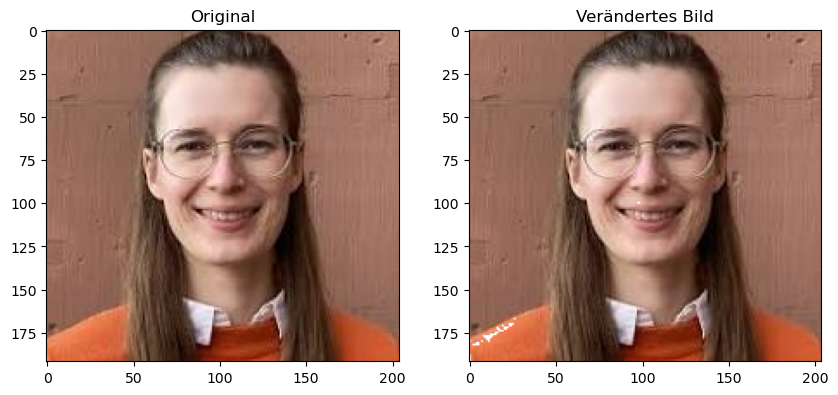

In [14]:
# Man kann Farben durch andere austauschen

# Wähle aus, welche Farbe du austauschen möchtest anhand eines Pixels
pixel_farbe = original_bild[180,11]
print(pixel_farbe)
Reihen, Spalten, Farbkanäle = original_bild.shape
verändertes_bild = original_bild.copy()


for i in range(0,Reihen):
    for j in range(0,Spalten):
        delta = np.asarray(original_bild[i,j]) - np.asarray(pixel_farbe)
        if np.sum(delta) < 150:
            verändertes_bild[i,j] = [255,255,255]; # RGB
        else:  verändertes_bild[i,j] = original_bild[i,j]
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(original_bild[:, :, :], vmin=0, vmax=255)
plt.title("Original")

plt.subplot(122)
plt.imshow(verändertes_bild[:, :, :], vmin=0, vmax=255)
plt.title("Verändertes Bild")

Text(0.5, 1.0, 'Graues Bild')

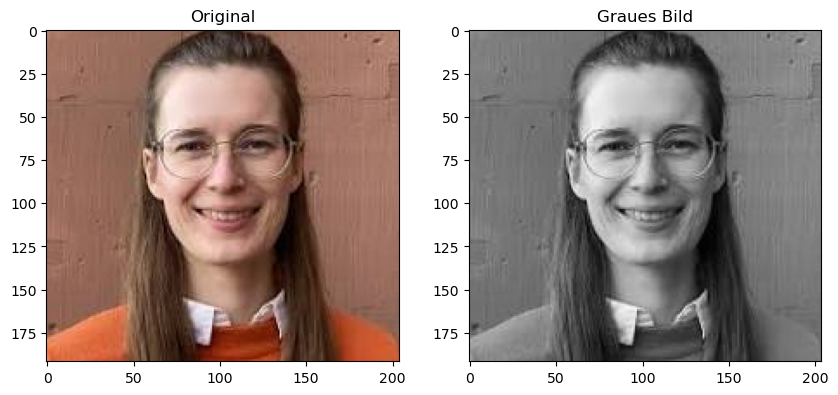

In [15]:
# Man kann farbige Bilder auch in graue Bilder umwandeln (Formal: Graues Bild = 0.299 ∙ Rot + 0.587 ∙ Grün + 0.114 ∙ Blau )

# Wähle aus, welche Farbe du austauschen möchtest anhand eines Pixels
pixel_farbe = original_bild[180,11]

graues_bild = 0.299 * original_bild[:,:,0] + 0.587 * original_bild[:,:,1] + 0.114 * original_bild[:,:,2] 

# Ergebnis anzeigen lassen
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(original_bild, vmin=0, vmax=255)
plt.title("Original")

plt.subplot(122)
plt.imshow(graues_bild, cmap="gray", vmin=0, vmax=255)
plt.title("Graues Bild")

# Bild Filter

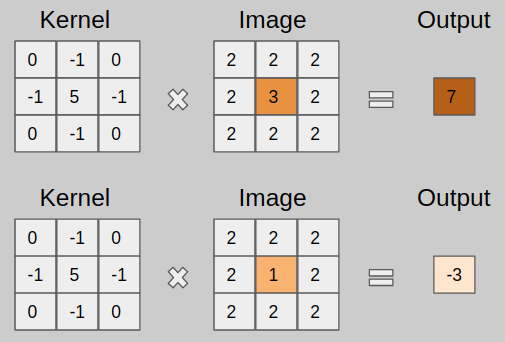

Text(0.5, 1.0, 'Bild mit Box Blur Filter')

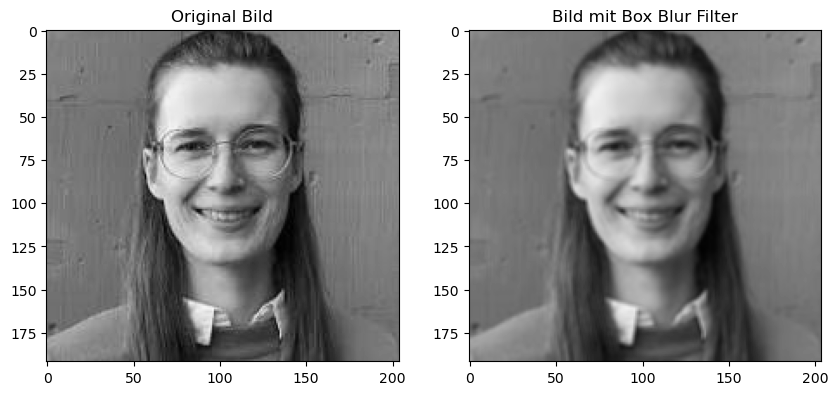

In [16]:
# Definiere den Filter
box_blur = np.array([[1, 1, 1], 
                     [1, 1, 1], 
                     [1, 1, 1]]) * 1/9

# Wende den Filter auf das Bild an
ergebnis_box_blur = cv2.filter2D(graues_bild, -1, box_blur)

# Schaue dir die Ergebnisse an
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(graues_bild, cmap="gray", vmin=0, vmax=255)
plt.title("Original Bild")

plt.subplot(122)
plt.imshow(ergebnis_box_blur, cmap="gray", vmin=0, vmax=255)
plt.title("Bild mit Box Blur Filter")

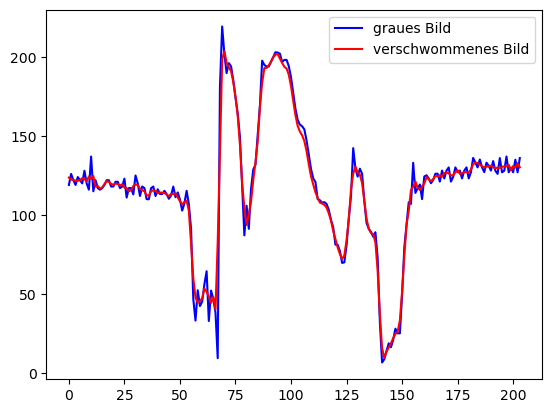

In [17]:
# Die Unterschiede zwischen den 2 Bildern kann man auch graphisch sehen
plt.plot(graues_bild[100,:], color = 'b', label="graues Bild")
plt.plot(ergebnis_box_blur[100,:], color = 'r', label="verschwommenes Bild")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Bild mit Sharpening Filter')

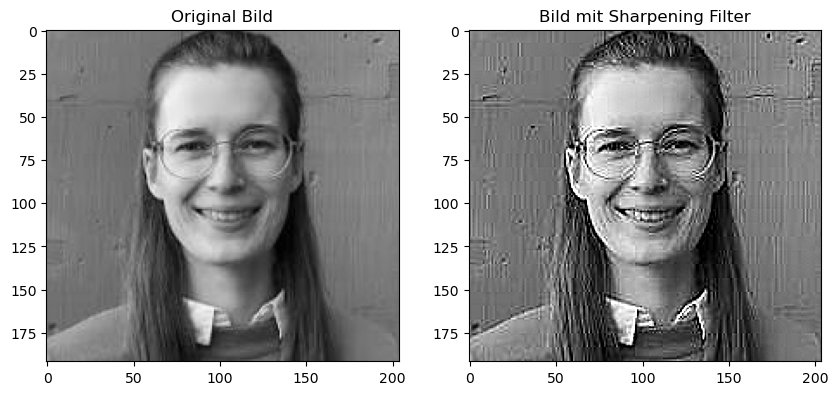

In [18]:
# Definiere den Filter
sharpening = np.array([[0, -1, 0], 
                     [-1, 5, -1], 
                     [0, -1, 0]]) 

# Wende den Filter auf das Bild an
ergebnis_sharpening = cv2.filter2D(graues_bild, -1, sharpening)

# Schaue dir die Ergebnisse an
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(graues_bild, cmap="gray", vmin=0, vmax=255)
plt.title("Original Bild")

plt.subplot(122)
plt.imshow(ergebnis_sharpening, cmap="gray", vmin=0, vmax=255)
plt.title("Bild mit Sharpening Filter")

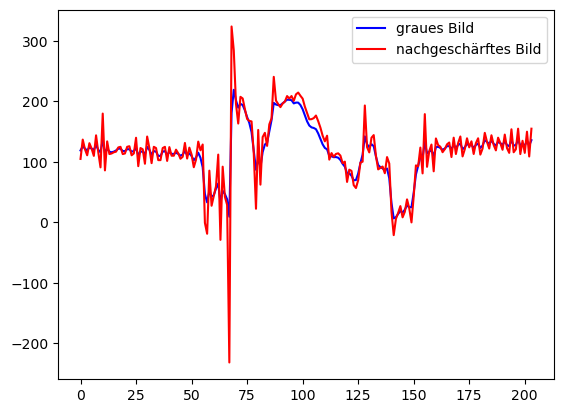

In [19]:
# Die Unterschiede zwischen den 2 Bildern kann man auch graphisch sehen
plt.plot(graues_bild[100,:], color = 'b', label="graues Bild")
plt.plot(ergebnis_sharpening[100,:], color = 'r', label="nachgeschärftes Bild")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Bild mit Kanten Filter (Laplacian)')

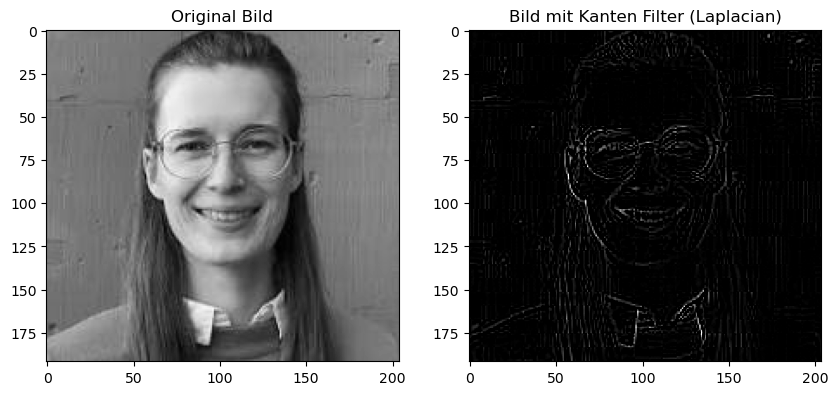

In [20]:
# Definiere den Filter
Kanten_filter = np.array([[0, 1, 0], 
                     [1, -4, 1], 
                     [0, 1, 0]]) 

# Wende den Filter auf das Bild an
ergebnis_kanten = cv2.filter2D(graues_bild, -1, Kanten_filter)

# Schaue dir die Ergebnisse an
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(graues_bild, cmap="gray", vmin=0, vmax=255)
plt.title("Original Bild")

plt.subplot(122)
plt.imshow(ergebnis_kanten, cmap="gray", vmin=0, vmax=255)
plt.title("Bild mit Kanten Filter (Laplacian)")

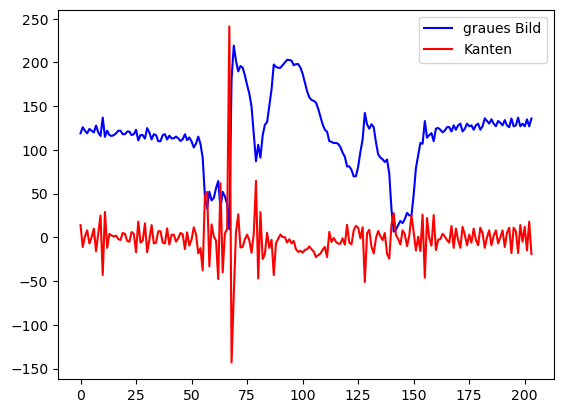

In [78]:
# Die Unterschiede zwischen den 2 Bildern kann man auch graphisch sehen
plt.plot(graues_bild[100,:], color = 'b', label="graues Bild")
plt.plot(ergebnis_kanten[100,:], color = 'r', label="Kanten")
plt.legend()
plt.show()

# Bild Pyramiden

Text(0.5, 1.0, 'Gauß-Pyramide')

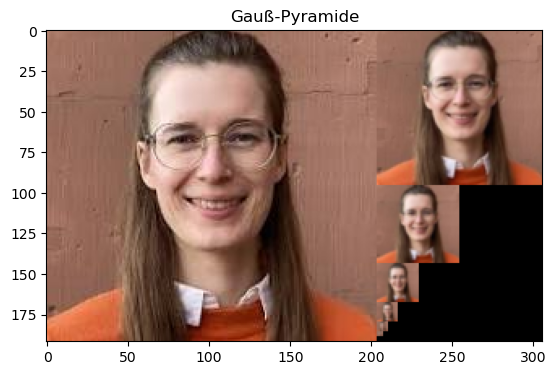

In [22]:
# Vorbereitung
lower = original_bild.copy()
Reihen, Spalten, Farbkanäle = original_bild.shape

# Gauß-Pyramiden erstellen
gaussian_pyr = [lower]
for i in range(6):
   lower = cv2.pyrDown(lower)
   gaussian_pyr.append(lower)

# Füge die einzelnen Bilder zu einem Ergebnis zusammen
composite_image = np.zeros((Reihen, int(1.5*Spalten), 3),dtype=int)
composite_image[:Reihen, :Spalten, :] = gaussian_pyr[0]
i_row = 0
for p in gaussian_pyr[1:]:
   n_rows, n_cols = p.shape[:2]
   composite_image[i_row : i_row + n_rows, Spalten : Spalten + n_cols] = p
   i_row += n_rows

# Zeige das Ergebnis an
plt.plot()
plt.imshow(composite_image, vmin=0, vmax=255)
plt.title("Gauß-Pyramide")


Text(0.5, 1.0, 'Laplace-Pyramide')

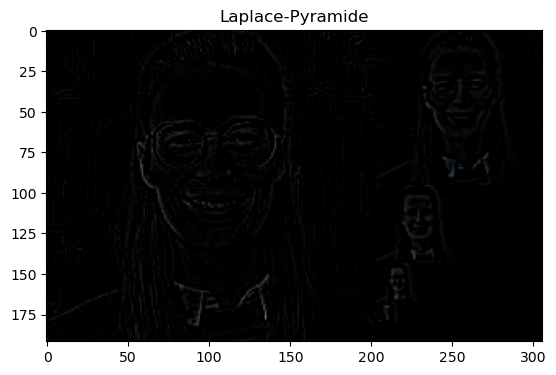

In [23]:
# Laplace-Pyramide erstellen basierend auf den Unterschieden zwischen Gauß-Pyramiden
Reihen, Spalten, Farbkanäle = original_bild.shape
laplace_pyr = [gaussian_pyr[5]]
for i in range(5,0,-1):
    size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
    GE = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
    L = cv2.subtract(gaussian_pyr[i-1],GE)
    laplace_pyr.append(L)

laplace_pyr_vis = laplace_pyr.copy()
laplace_pyr_vis.reverse()

# Füge die einzelnen Bilder zu einem Ergebnis zusammen
composite_image = np.zeros((Reihen, int(1.5*Spalten), 3),dtype=int)
composite_image[:Reihen, :Spalten, :] = laplace_pyr_vis[0]
i_row = 0
for p in laplace_pyr_vis[1:-1]:
   n_rows, n_cols = p.shape[:2]
   composite_image[i_row : i_row + n_rows, Spalten : Spalten + n_cols] = p
   i_row += n_rows

# Zeige das Ergebnis an
plt.plot()
plt.imshow(composite_image, vmin=0, vmax=255)
plt.title("Laplace-Pyramide")

# 2 Bilder miteinander kombinieren

(192, 204, 3) (192, 204, 3)


Text(0.5, 1.0, 'Wolfsbild')

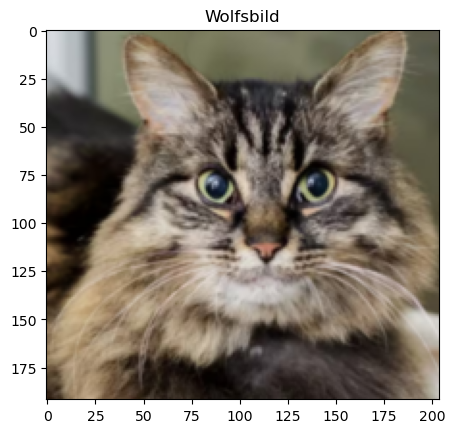

In [97]:
katze_original = Image.open('Bilder/Katze.png')
Reihen, Spalten, Farbkanäle = original_bild.shape
katze = katze_original.crop((100,0,650, 400))
katze = cv2.pyrDown(np.asarray(katze))
#wolf = cv2.pyrDown(lower, dstsize=(Spalten,Reihen))
katze = katze[:-8,71:,:3]
print(original_bild.shape,katze.shape)

# Zeige das Ergebnis an
plt.plot()
plt.imshow(katze, vmin=0, vmax=255)
plt.title("Wolfsbild")

Text(0.5, 1.0, 'Wolfsbild')

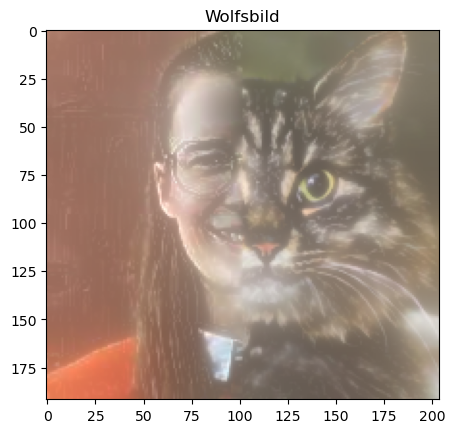

In [98]:
# Gauß-Pyramiden erstellen
lower2 = katze.copy()
gaussian_pyr2 = [lower2]
for i in range(6):
   lower2 = cv2.pyrDown(lower2)
   gaussian_pyr2.append(lower2)

# Laplace-Pyramide
laplace_pyr2 = [gaussian_pyr2[5]]
for i in range(5,0,-1):
    size = (gaussian_pyr2[i - 1].shape[1], gaussian_pyr2[i - 1].shape[0])
    GE = cv2.pyrUp(gaussian_pyr2[i], dstsize=size)
    L = cv2.subtract(gaussian_pyr2[i-1],GE)
    laplace_pyr2.append(L)

# Now add left and right halves of images in each level
LS = []
for la,lb in zip(laplace_pyr,laplace_pyr2):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    size = (LS[i].shape[1], LS[i].shape[0])
    ls_ = cv2.pyrUp(ls_,dstsize=size)
    ls_ = cv2.add(ls_, LS[i])

# Zeige das Ergebnis an
plt.plot()
plt.imshow(ls_, vmin=0, vmax=255)
plt.title("Wolfsbild")


# Um schönere Bilder zu bekommen, müssen die Gesichter ungefähr auf der gleichen Höhe sein.

Number of detected faces: 1


Text(0.5, 1.0, 'Wolfsbild')

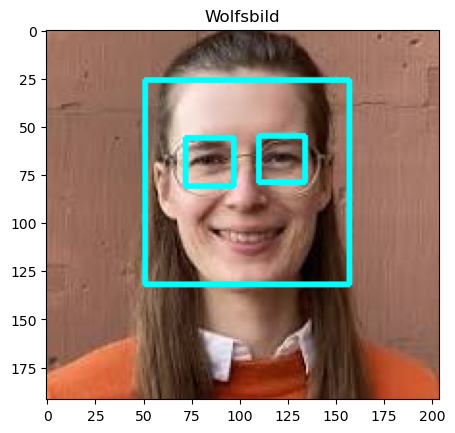

In [99]:
# 
grau = np.array(graues_bild, dtype='uint8')
farbig = np.array(original_bild, dtype="uint8")
# Lade die Modell für die Gesichts- und Augenerkennung
face_cascade = cv2.CascadeClassifier("/home/lprasse/miniconda3/envs/jupyter/share/opencv4/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier('/home/lprasse/miniconda3/envs/jupyter/share/opencv4/haarcascades/haarcascade_eye_tree_eyeglasses.xml')
face_cascade2 = cv2.CascadeClassifier("/home/lprasse/miniconda3/envs/jupyter/share/opencv4/haarcascades/haarcascade_frontalcatface.xml")

# erkenne das Gesicht
faces = face_cascade.detectMultiScale(grau, 1.3, 4)
print('Number of detected faces:', len(faces))

# loop over the detected faces
for (x,y,w,h) in faces:
   roi_gray = grau[y:y+h, x:x+w]
   roi_color = farbig[y:y+h, x:x+w]
   cv2.rectangle(farbig, (x,y), (x+w,y+h),(0,255,255),2)
   # detects eyes of within the detected face area (roi)
   eyes = eye_cascade.detectMultiScale(roi_gray)
   
   # draw a rectangle around eyes
   for (ex,ey,ew,eh) in eyes:
      cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,255),2)

# display the image with detected eyes
#cv2.imshow('Eyes Detection',farbig)

plt.plot()
plt.imshow(farbig, vmin=0, vmax=255)
plt.title("Wolfsbild")

Number of detected faces: 1


Text(0.5, 1.0, 'Wolfsbild')

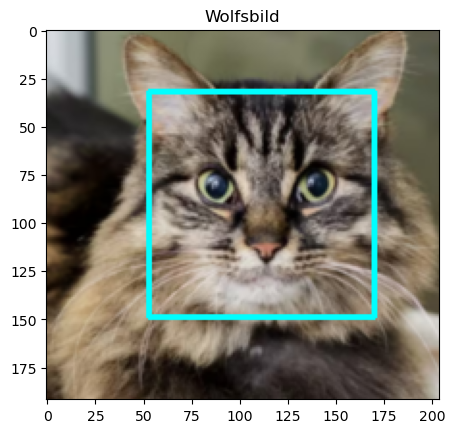

In [100]:
farbiger_wolf = np.array(katze, dtype='uint8')
grauer_wolf = cv2.cvtColor(farbiger_wolf, cv2.COLOR_BGR2GRAY)


# erkenne das Gesicht
faces = face_cascade2.detectMultiScale(grauer_wolf, 1.3, 4)
print('Number of detected faces:', len(faces))

# loop over the detected faces
# loop over the detected faces
for (x,y,w,h) in faces:
   roi_gray = grau[y:y+h, x:x+w]
   roi_color = farbig[y:y+h, x:x+w]
   cv2.rectangle(farbiger_wolf, (x,y), (x+w,y+h),(0,255,255),2)
   # detects eyes of within the detected face area (roi)
   eyes = eye_cascade.detectMultiScale(roi_gray)
   
   # draw a rectangle around eyes
   for (ex,ey,ew,eh) in eyes:
      cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,255),2)
       



plt.plot()
plt.imshow(farbiger_wolf, vmin=0, vmax=255)
plt.title("Wolfsbild")

Text(0.5, 1.0, 'Faultierbild')

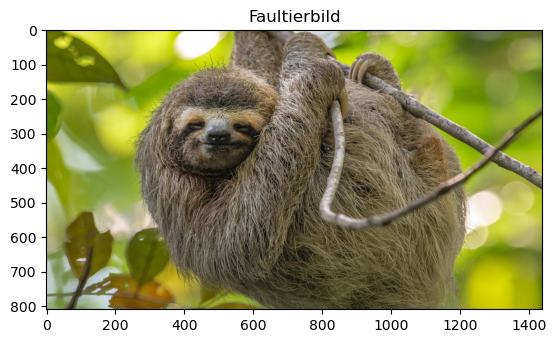

In [69]:
faultier = Image.open('Bilder/faultier.jpg')
# Zeige das Ergebnis an
plt.plot()
plt.imshow(faultier, vmin=0, vmax=255)
plt.title("Faultierbild")